# cf-python exercise 5

In [1]:
# import the cf package
import cf

In [2]:
# Read the field from file ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
# This contains a monthly timeseries from 1959-12-01 to 1969-12-01
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [3]:
# Create a timeseries of seasonal (DJF, MAM, JJA, SON) means
# (set "group=cf.seasons()" as a parameter of the collapse method)
g = f.collapse('T: mean', group=cf.seasons())
print(g)
print(g.coordinate('T').bounds.datetime_array[0:2])

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(40), latitude(145), longitude(192)) K
Cell methods    : time(40): mean (interval: 30 minutes) time(40): mean
Dimension coords: time(40) = [1960-01-15 00:00:00, ..., 1969-10-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
[[cftime.DatetimeNoLeap(1959, 12, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1960, 3, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 3, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1960, 6, 1, 0, 0, 0, 0)]]


In [4]:
# Create a timeseries of seasonal (JFMA, MJJA, SOND) means
# (use the "n" and "start" parameters of the cf.seasons function)
g = f.collapse('T: mean', group=cf.seasons(n=3, start=1))
print(g)
print(g.coordinate('T').bounds.datetime_array[0:2])

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(31), latitude(145), longitude(192)) K
Cell methods    : time(31): mean (interval: 30 minutes) time(31): mean
Dimension coords: time(31) = [1959-12-16 12:00:00, ..., 1969-10-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
[[cftime.DatetimeNoLeap(1959, 12, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1960, 1, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 1, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1960, 5, 1, 0, 0, 0, 0)]]


In [5]:
# Create a timeseries similar to that of the previous cell
# (i.e. of seasonal (JFMA, MJJA, SOND) means), but which now
# excludes averaging periods of less that 4 months
# (set "group_span=cf.M(4)" as a parameter of the collapse method)
g = f.collapse('T: mean', group=cf.seasons(n=3, start=1), group_span=cf.M(4))
print(g)
print(g.coordinate('T').bounds.dtarray[0:2])

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(29), latitude(145), longitude(192)) K
Cell methods    : time(29): mean (interval: 30 minutes) time(29): mean
Dimension coords: time(29) = [1960-03-02 00:00:00, ..., 1969-07-01 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
[[cftime.DatetimeNoLeap(1960, 1, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1960, 5, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 5, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1960, 9, 1, 0, 0, 0, 0)]]


In [6]:
# Find the multiannual average of the seasonal (DJF, MAM, JJA, SON) minima and
# plot the result for JJA 
# (use the special argument 'T: minimum within years T: mean over years' to
# the field's "collapse" method.
# This also requires the "within_years" parameter to define over which periods
# to take the minima within each year. Set this parameter to cf.seasons(), which
# will specify the four seasons of DJF, MAM, JJA, SON)

g = f.collapse('T: minimum within years T: mean over years', within_years=cf.seasons())
print(g)


Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(4), latitude(145), longitude(192)) K
Cell methods    : time(4): mean (interval: 30 minutes) time(4): minimum within years time(4): mean over years
Dimension coords: time(4) = [1960-01-15 00:00:00, ..., 1960-10-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [7]:
%matplotlib inline

In [8]:
import cfplot as cfp

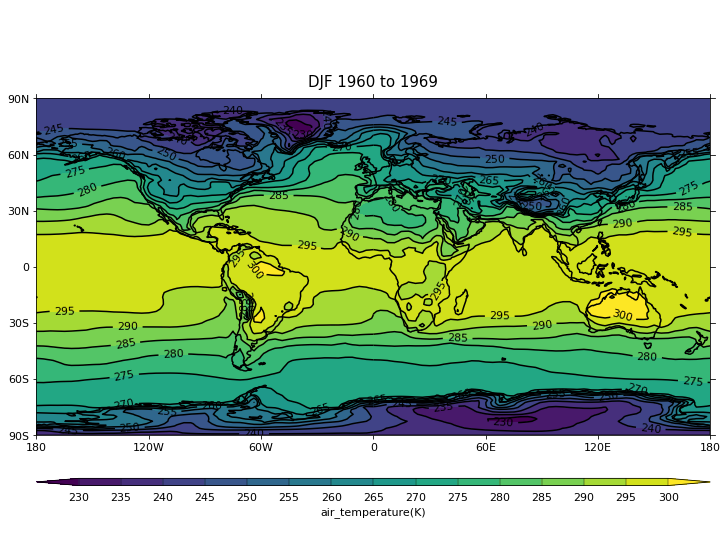

In [9]:
# create for each of the seasons 
# Note December begins at 0

cfp.con(g.subspace(T=cf.month(cf.wi(0, 2))), title='DJF 1960 to 1969')

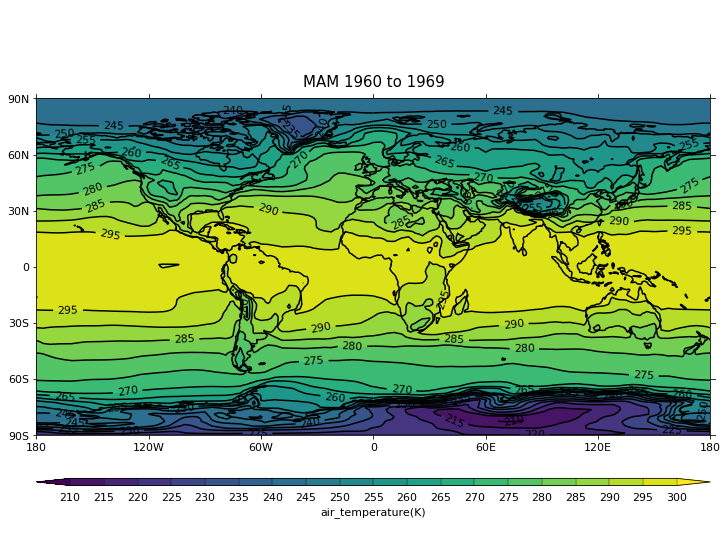

In [10]:
# March, April and May.

cfp.con(g.subspace(T=cf.month(cf.wi(3, 5))), title='MAM 1960 to 1969')

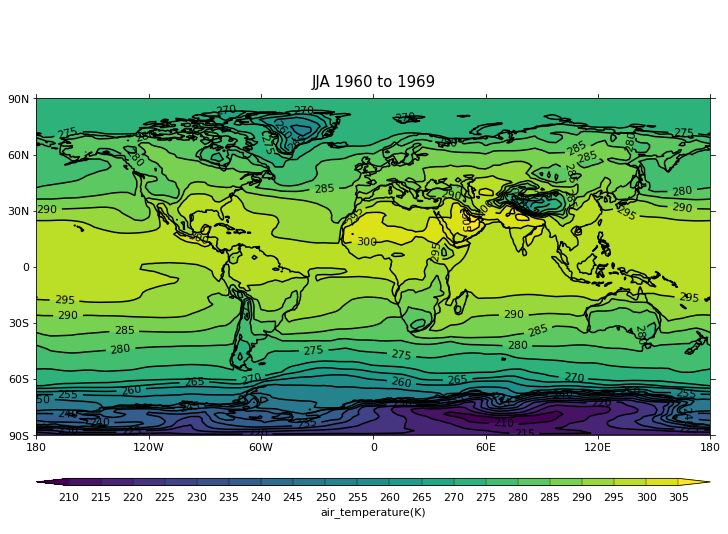

In [11]:
#create for each of the seasons 
cfp.con(g.subspace(T=cf.month(cf.wi(6, 8))), title='JJA 1960 to 1969')

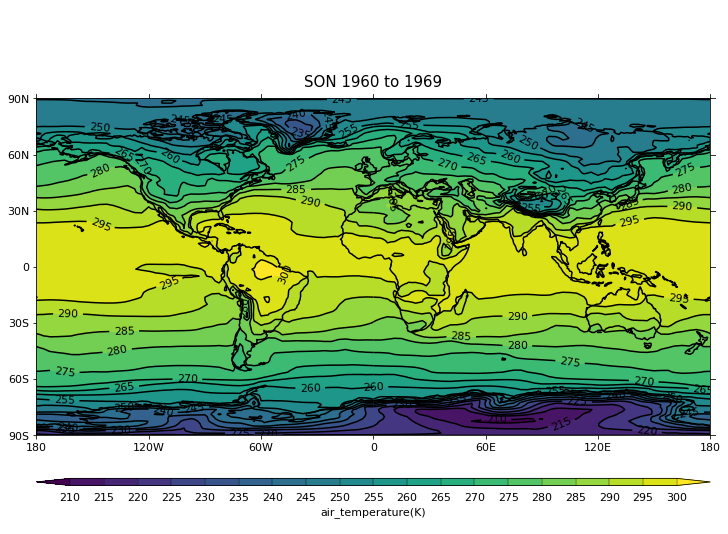

In [12]:
# September, October and November.

cfp.con(g.subspace(T=cf.month(cf.wi(9, 11))), title='SON 1960 to 1969')

In [13]:
# Print the values of the time coordiantes and the time coordinate bounds.
# Note that the bounds span the full 10 years,
# but the coordinate values themselves lie in the season of the first year
print(g.coordinate('T').datetime_array)

[cftime.DatetimeNoLeap(1960, 1, 15, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1960, 4, 16, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1960, 7, 17, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1960, 10, 16, 12, 0, 0, 0)]


In [14]:
print(g.coordinate('T').bounds.datetime_array)

[[cftime.DatetimeNoLeap(1959, 12, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1969, 3, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 3, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1969, 6, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 6, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1969, 9, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 9, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1969, 12, 1, 0, 0, 0, 0)]]
